## Selecting elbow point for k-means clustering

In [3]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
# importing dataset
rocks = pd.read_csv("rocks-assessment3.csv")

rocks

,reflective-red,reflective-blue,hard,porous
0,2.844215,2.963396,7.113128,5.246739
1,2.168376,2.609742,5.614799,5.571129
2,3.285575,2.643181,6.433660,5.409300
3,1.738608,2.946285,6.505526,5.393949
4,2.921743,2.685629,8.540025,5.918761
...,...,...,...,...
180,7.501657,2.106162,9.590414,5.381240
181,8.905066,1.675838,7.297609,4.795633
182,6.957330,1.257097,8.556775,5.739334
183,7.825338,1.548171,9.267241,4.941576


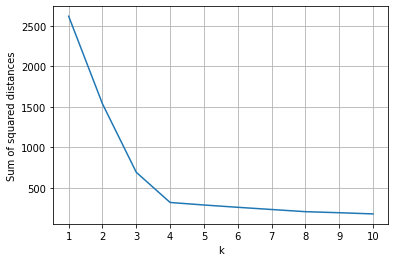

In [7]:
# empty dictionary for storing k : sum of squared distances of samples to their closest cluster center
results = {}

# testing ks from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(rocks)
    # inertia_ attribute stores the sum of squared distances of samples to their closest cluster center
    results[k] = kmeans.inertia_

# plotting the results
plt.plot(results.keys(), results.values())
plt.xticks(list(results.keys()))
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.grid()
plt.show()

In the above graph we can see that the elbow point occurs when k = 4.

In [8]:
# adding predicted class to the dataframe
rocks["class"] = KMeans(n_clusters=4, random_state=0).fit_predict(rocks)

rocks

,reflective-red,reflective-blue,hard,porous,class
0,2.844215,2.963396,7.113128,5.246739,3
1,2.168376,2.609742,5.614799,5.571129,3
2,3.285575,2.643181,6.433660,5.409300,3
3,1.738608,2.946285,6.505526,5.393949,3
4,2.921743,2.685629,8.540025,5.918761,3
...,...,...,...,...,...
180,7.501657,2.106162,9.590414,5.381240,0
181,8.905066,1.675838,7.297609,4.795633,0
182,6.957330,1.257097,8.556775,5.739334,0
183,7.825338,1.548171,9.267241,4.941576,0


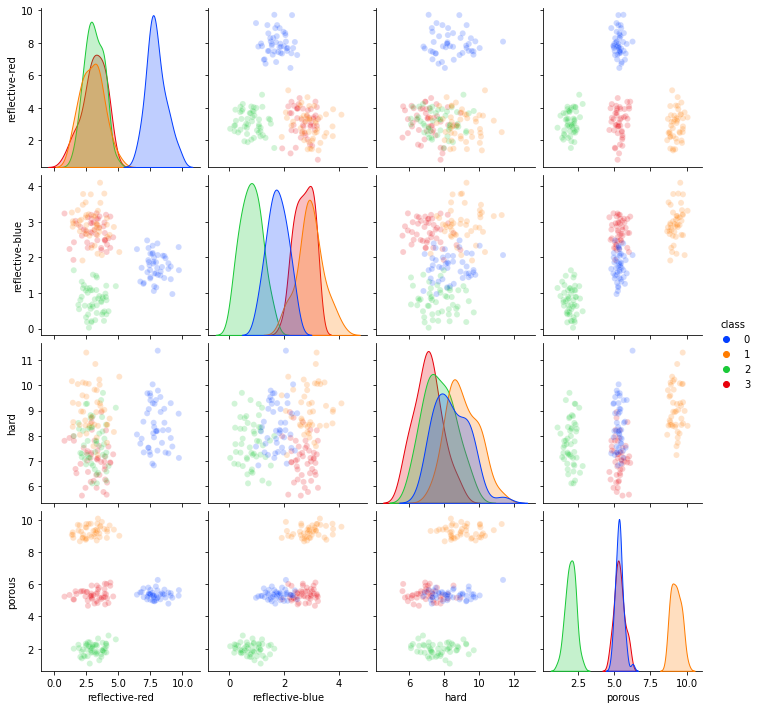

In [9]:
# visualising the clustered data
sns.pairplot(rocks, diag_kind='kde', plot_kws={'alpha': 0.2}, hue = "class", palette="bright")
plt.show()